In [1]:
import pandas as pd

In [2]:
file_path = 'All_States_GE.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')
df.head()

,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,...,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type
0,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,1,KULDEEP RAI SHARMA,M,...,1.0,0.0,0.0,1.0,Graduate Professional,Business,NaN,Social Work,NaN,Lok Sabha Election (GE)
1,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,2,VISHAL JOLLY,M,...,0.0,0.0,0.0,0.0,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN,Lok Sabha Election (GE)
2,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,3,PARITOSH KUMAR HALDAR,M,...,0.0,0.0,0.0,0.0,Post Graduate,Agriculture,NaN,NaN,NaN,Lok Sabha Election (GE)
3,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,4,SANJAY MESHACK,M,...,0.0,0.0,0.0,1.0,12th Pass,Business,NaN,Politics,Municipality Member,Lok Sabha Election (GE)
4,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,5,PRAKASH MINJ,M,...,0.0,0.0,0.0,0.0,Post Graduate,Social Work,NaN,NaN,NaN,Lok Sabha Election (GE)


In [3]:

# check how many distinct parties there are
print(len(df['Party'].unique()))

1615


# Data Analysis

3. Show change in turnout per state throughout the years. (changing bar graph)



### 1. Plotting states on india map and assigning color according leading party

In [4]:
# 1

# store only rows with Year = 2019 in a df
df_2019 = df[df['Year'] == 2019]
df_2014 = df[df['Year'] == 2014]

def find_leading_party(df_2019):
    # Step 1: Find the party with the most votes in each constituency within each state
    df_max_votes = df_2019.groupby(['State_Name', 'Constituency_Name'], as_index=False)['Votes'].max()
    result_df = df_2019.merge(df_max_votes, on=['State_Name', 'Constituency_Name', 'Votes'])

    # Step 2: Find the party that has won in the most constituencies in each state
    state_party_counts = result_df.groupby(['State_Name', 'Party']).size().reset_index(name='Count')
    idx = state_party_counts.groupby('State_Name')['Count'].idxmax()
    most_winning_parties = state_party_counts.loc[idx]

    # Step 3: Store the result for each state in a dictionary
    state_results = {}
    for state, party in zip(most_winning_parties['State_Name'], most_winning_parties['Party']):
        state_results[state] = party

    # replace all _ in the keys of state_results with spacebar
    state_results = {k.replace('_', ' '): v for k, v in state_results.items()}
    state_results = {k.upper().replace('&', 'AND'): v for k, v in state_results.items()}

    # convert to df with keys as States and parties
    df_state_results = pd.DataFrame.from_dict(state_results, orient='index', columns=['Party'])
    df_state_results.reset_index(inplace=True)
    df_state_results.rename(columns={'index': 'STATE'}, inplace=True)
    df_state_results.head()
    #replace state name odisha with orissa
    df_state_results['STATE'] = df_state_results['STATE'].replace('ODISHA', 'ORISSA')
    df_state_results['STATE'] = df_state_results['STATE'].replace('PUDUCHERRY', 'PONDICHERRY')
    
    return df_state_results

In [5]:
df_2019_state_results = find_leading_party(df_2019)
df_2014_state_results = find_leading_party(df_2014)

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def merge_with_shapefile(df_state_results):
    # Load the shapefile of Indian states
    shapefile_path = 'india_st.shx'
    india_map = gpd.read_file(shapefile_path)
    india_map.head()

    # Merge the dataframes on the 'STATE' column
    result_df = pd.merge(df_state_results, india_map, on='STATE', how='outer')
    result_df.head()

    return result_df

result_df_2019 = merge_with_shapefile(df_2019_state_results)
result_df_2014 = merge_with_shapefile(df_2014_state_results)

In [7]:
import numpy as np
# Get all unique parties in result_df
parties_2014 = result_df_2014['Party'].unique()
parties_2019 = result_df_2019['Party'].unique()
parties = np.union1d(parties_2014, parties_2019)
color_dict = {}
colors = []
import random
def random_color():
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return r, g, b 

def rgb_to_hex(rgb):
    """Convert RGB tuple to hexadecimal color code."""
    return '#{:02x}{:02x}{:02x}'.format(*rgb)

for party in parties:
    # assign a random color to party
    color_dict[party] = rgb_to_hex(random_color())

In [8]:
# Add a color column in result_df using color_dict
def add_color_column(result_df): 
    result_df['color'] = result_df['Party'].apply(lambda x: color_dict[x])
    result_df.head()
    return result_df

result_df_2014 = add_color_column(result_df_2014)
result_df_2019 = add_color_column(result_df_2019)

{'State': ['ANDAMAN AND NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'DADRA AND NAGAR HAVELI', 'DAMAN AND DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ORISSA', 'PONDICHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'], 'Color': ['#665161', '#3c9a58', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#208889', '#28cc39', '#665161', '#665161', '#208889', '#208889', '#208889', '#abf443', '#a977e4', '#73075b', '#98223b', '#665161', '#f962e1', '#96738b', '#23a4d3', '#665161', '#665161', '#93c01f'], 'Party': ['BJP', 'TDP', 'BJP', 'BJP', 'BJP', 'BJP', 'BJP', 'BJP', 'BJP', 'BJP', 'BJP', 'BJP

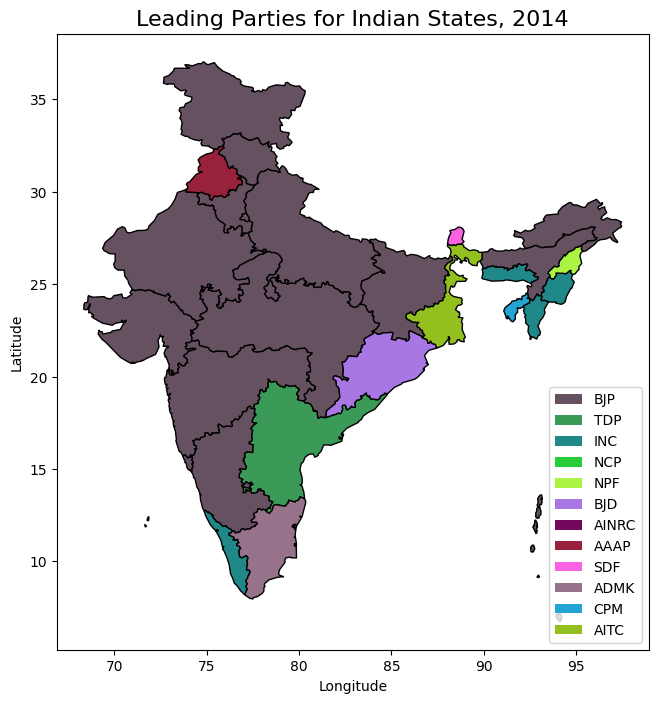

{'State': ['ANDAMAN AND NICOBAR ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'DADRA AND NAGAR HAVELI', 'DAMAN AND DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ORISSA', 'PONDICHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TELANGANA', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'], 'Color': ['#208889', '#88a36a', '#665161', '#665161', '#665161', '#665161', '#665161', '#4983a1', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#665161', '#208889', '#28cc39', '#665161', '#665161', '#665161', '#208889', '#511b45', '#319e62', '#a977e4', '#208889', '#208889', '#665161', '#27e421', '#7f2e31', '#342511', '#665161', '#665161', '#665161', '#93c01f'], 'Party': ['INC', 'YSRCP', 'BJP', 'BJP', 'BJP', 'BJP', 'BJP', 'IND',

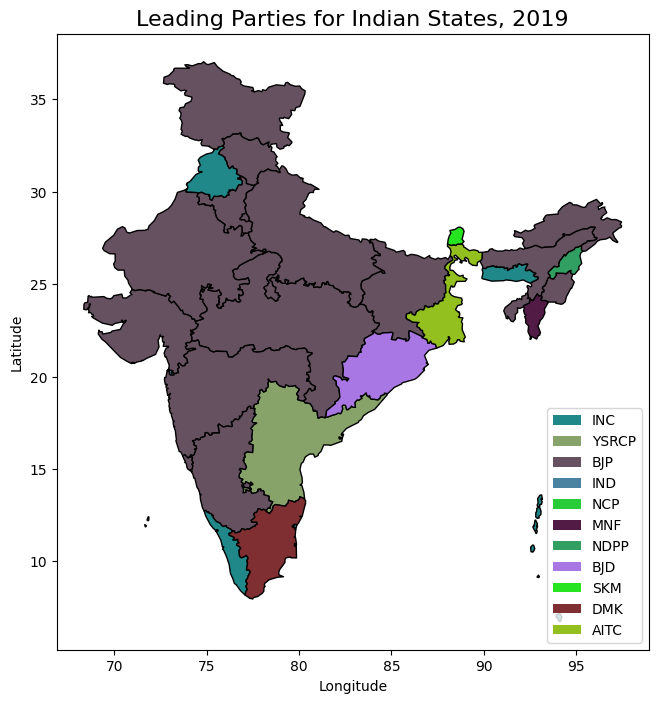

In [9]:

def plot_result_df(result_df, year):
    #   convert the result_df according to the above dictionary format
    states_array = []
    colors_array = []
    party_array = [] 
    edgecolor_array = ['0.0' for i in range(len(result_df))]

    # iterate the dataframe result_df
    for index, row in result_df.iterrows():
        states_array.append(row['STATE'])
        colors_array.append(row['color'])
        party_array.append(row['Party'])

    our_data = {
        'State' : states_array,
        'Color' : colors_array,
        'Party' : party_array
    }

    print(our_data)
    state_colors_df = pd.DataFrame(our_data)

    shapefile_path = './india_st.dbf'
    gdf = gpd.read_file(shapefile_path)

    merged_gdf = gdf.merge(state_colors_df, left_on='STATE', right_on='State')
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the map
    merged_gdf.plot(ax=ax, color=merged_gdf['Color'], edgecolor=edgecolor_array)

    color_dict = dict(zip(merged_gdf['Party'], merged_gdf['Color']))
    legend_elements = [Patch(facecolor=color_dict[party], label=party) for party in color_dict.keys()]
    ax.legend(handles=legend_elements, loc='lower right')
    ax.set_title('Leading Parties for Indian States, ' + str(year), fontsize=16)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Show the plot
    plt.show()

plot_result_df(result_df_2014, 2014)
plot_result_df(result_df_2019, 2019)

### 2. Calculating average Educational qualifications of candidates in every state and show changing qualifications over the years (line graph for each state)

In [20]:
# print all unique values from the MyNeta_education column in the df
edu_df = df
edu_df
# create a dict mapping 'Graduate Professional', 'Post Graduate', '12th Pass', 'Graduate', nan, '10th Pass', '8th Pass', 'Doctorate', 'Illiterate', 'Others', '5th Pass', 'Literate' to numbers ranging from 1 to 10
edu_dict = {'Graduate Professional': 9, 'Post Graduate': 8, '12th Pass': 6, 'Graduate': 7, '10th Pass': 5, '8th Pass': 4, 'Doctorate': 10, 'Illiterate': 1, 'Others': 5.5, '5th Pass': 3, 'Literate': 2}

# replace MyNeta_education column with calues from the dict
edu_df['MyNeta_education'] = edu_df['MyNeta_education'].replace(edu_dict)

State_Name
Mizoram                      6.958333
Puducherry                   6.837675
Manipur                      6.733284
Meghalaya                    6.730556
Lakshadweep                  6.687500
Sikkim                       6.559524
Nagaland                     6.458333
Goa                          6.453947
Odisha                       6.284475
Arunachal_Pradesh            6.259980
Uttarakhand                  6.063059
Andhra_Pradesh               6.055955
Himachal_Pradesh             6.052745
Assam                        6.034749
West_Bengal                  6.029664
Chandigarh                   5.973958
Uttar_Pradesh                5.946990
Delhi                        5.916542
Jharkhand                    5.904026
Kerala                       5.876851
Jammu_&_Kashmir              5.867508
Karnataka                    5.866179
Tripura                      5.833406
Tamil_Nadu                   5.811054
Haryana                      5.800920
Andaman_&_Nicobar_Islands    5.769444
B

/tmp/ipykernel_6442/1795206113.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(all_states, rotation=90, ha='right')


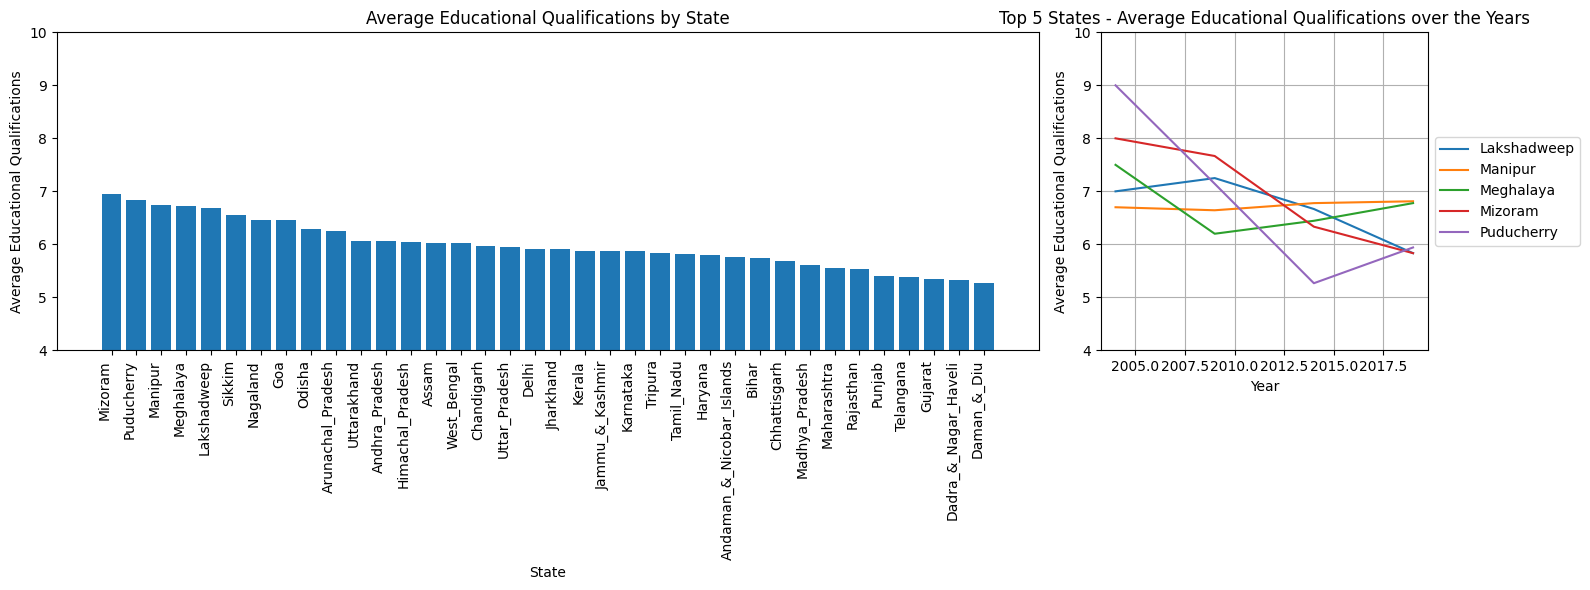

In [21]:
filtered_data = edu_df[edu_df['Year'] >= 2004].copy()  # Make a copy to avoid SettingWithCopyWarning
filtered_data['MyNeta_education'] = pd.to_numeric(filtered_data['MyNeta_education'], errors='coerce')

# Drop rows with invalid values (e.g., non-numeric values that couldn't be converted)
filtered_data = filtered_data.dropna(subset=['MyNeta_education'])

# Calculate the average MyNeta_education for each state over the years
grouped_data = filtered_data.groupby(['State_Name', 'Year'])['MyNeta_education'].mean().reset_index()
state_avg_education = grouped_data.groupby('State_Name')['MyNeta_education'].mean()

# Print all states and avg_education values in descending order
all_states_avg_education = state_avg_education.sort_values(ascending=False)
print(all_states_avg_education)

# Select the top 5 states with the highest average MyNeta_education
top_5_states = state_avg_education.nlargest(5).index

# Filter the data to include only the top 5 states
top_5_data = grouped_data[grouped_data['State_Name'].isin(top_5_states)]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

# Plot all states' average educational qualifications on the left subplot (ax1)
all_states = all_states_avg_education.index
avg_educations = all_states_avg_education.values
ax1.bar(all_states, avg_educations)

ax1.set_xlabel('State')
ax1.set_ylabel('Average Educational Qualifications')
ax1.set_title('Average Educational Qualifications by State')
ax1.set_ylim(4, 10)  # Set y-axis limits from 4 to 10

# Rotate X-axis labels to avoid overlap
ax1.set_xticklabels(all_states, rotation=90, ha='right')

# Plot the line graph for top 5 states on the right subplot (ax2)
for state, data in grouped_data.groupby('State_Name'):
    if state in top_5_states:
        ax2.plot(data['Year'], data['MyNeta_education'], label=state)

ax2.set_xlabel('Year')
ax2.set_ylabel('Average Educational Qualifications')
ax2.set_title('Top 5 States - Average Educational Qualifications over the Years')
ax2.set_ylim(4, 10)  # Set y-axis limits from 4 to 10
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.grid(True)

# Adjust spacing between the subplots
plt.tight_layout()

plt.show()


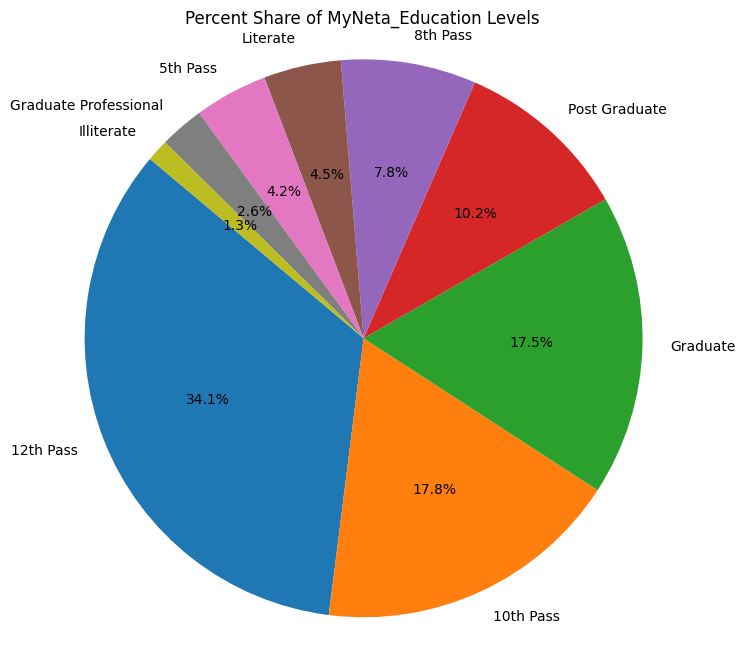

In [24]:
# print percent share of each MyNeta_Education in a pie chart using filtered_data

education_mapping = {9:'Graduate Professional', 8:'Post Graduate', 6:'12th Pass', 7:'Graduate', 5:'10th Pass', 4:'8th Pass', 10:'Doctorate', 1:'Illiterate', 5.5:'Others', 3:'5th Pass', 2:'Literate'}
# Count the occurrences of each value in the 'MyNeta_Education' column
value_counts = filtered_data['MyNeta_education'].value_counts()

# Get the labels and sizes for the pie chart
labels = [education_mapping.get(value, str(value)) for value in value_counts.index]
sizes = value_counts.values

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percent Share of MyNeta_Education Levels')
plt.show()


## Data Preprocessing

#### 1. Dropping unnecessary columns and converting all data to float

In [ ]:
pred_df = edu_df
pred_df = pred_df.dropna(axis=1, thresh=0.5*len(pred_df))
pred_df = pred_df.dropna(axis=0, thresh=0.5*len(pred_df.columns))

# drop all rows with Candidate == NOTA
pred_df = pred_df[pred_df.Candidate != 'NOTA']
# drop Votes, Valid_Votes and Electors column
pred_df = pred_df.drop(['Votes', 'Vote_Share_Percentage', 'Margin_Percentage', 'Party_ID', 'Margin', 'Valid_Votes', 'Electors', 'Constituency_Name', 'Election_Type', 'pid', 'Candidate'], axis=1)

#replace state_name with state_id
state_name_to_id = {name: i for i, name in enumerate(pred_df['State_Name'].unique())}
pred_df['State_Name'] = pred_df['State_Name'].replace(state_name_to_id)
# replace party names by their ids
party_name_to_id = {name: i for i, name in enumerate(pred_df['Party'].unique())}
pred_df['Party'] = pred_df['Party'].replace(party_name_to_id)

# print dtype of each column
print(pred_df.dtypes)


State_Name              int64
Assembly_No             int64
Constituency_No         int64
Year                    int64
month                 float64
Poll_No                 int64
DelimID                 int64
Position                int64
Sex                    object
Party                   int64
Constituency_Type      object
N_Cand                  int64
Turnout_Percentage    float64
Deposit_Lost           object
ENOP                  float64
Party_Type_TCPD        object
last_poll                bool
Contested             float64
No_Terms              float64
Turncoat              float64
Incumbent             float64
Recontest             float64
dtype: object


#### 2. One-Hot encoding 

In [ ]:
# Perform one-hot encoding on specific columns
columns_to_encode = ['Sex', 'Constituency_Type', 'Deposit_Lost', 'Party_Type_TCPD', 'last_poll']
df_encoded = pd.get_dummies(pred_df, columns=columns_to_encode, dtype=int)

#convert all columns to float
df_uniform = df_encoded.astype(float)

# print dtype of each column
print(df_uniform.dtypes)

#drop columns with a majority of nan values
df_uniform = df_uniform.dropna(axis=1, thresh=0.5*len(df_uniform))

# replace all nan values in all the columns with avg
df_uniform = df_uniform.fillna(df_uniform.mean())


State_Name                                         float64
Assembly_No                                        float64
Constituency_No                                    float64
Year                                               float64
month                                              float64
Poll_No                                            float64
DelimID                                            float64
Position                                           float64
Party                                              float64
N_Cand                                             float64
Turnout_Percentage                                 float64
ENOP                                               float64
Contested                                          float64
No_Terms                                           float64
Turncoat                                           float64
Incumbent                                          float64
Recontest                                          float

#### 3. Pearson Correlation

<AxesSubplot:>

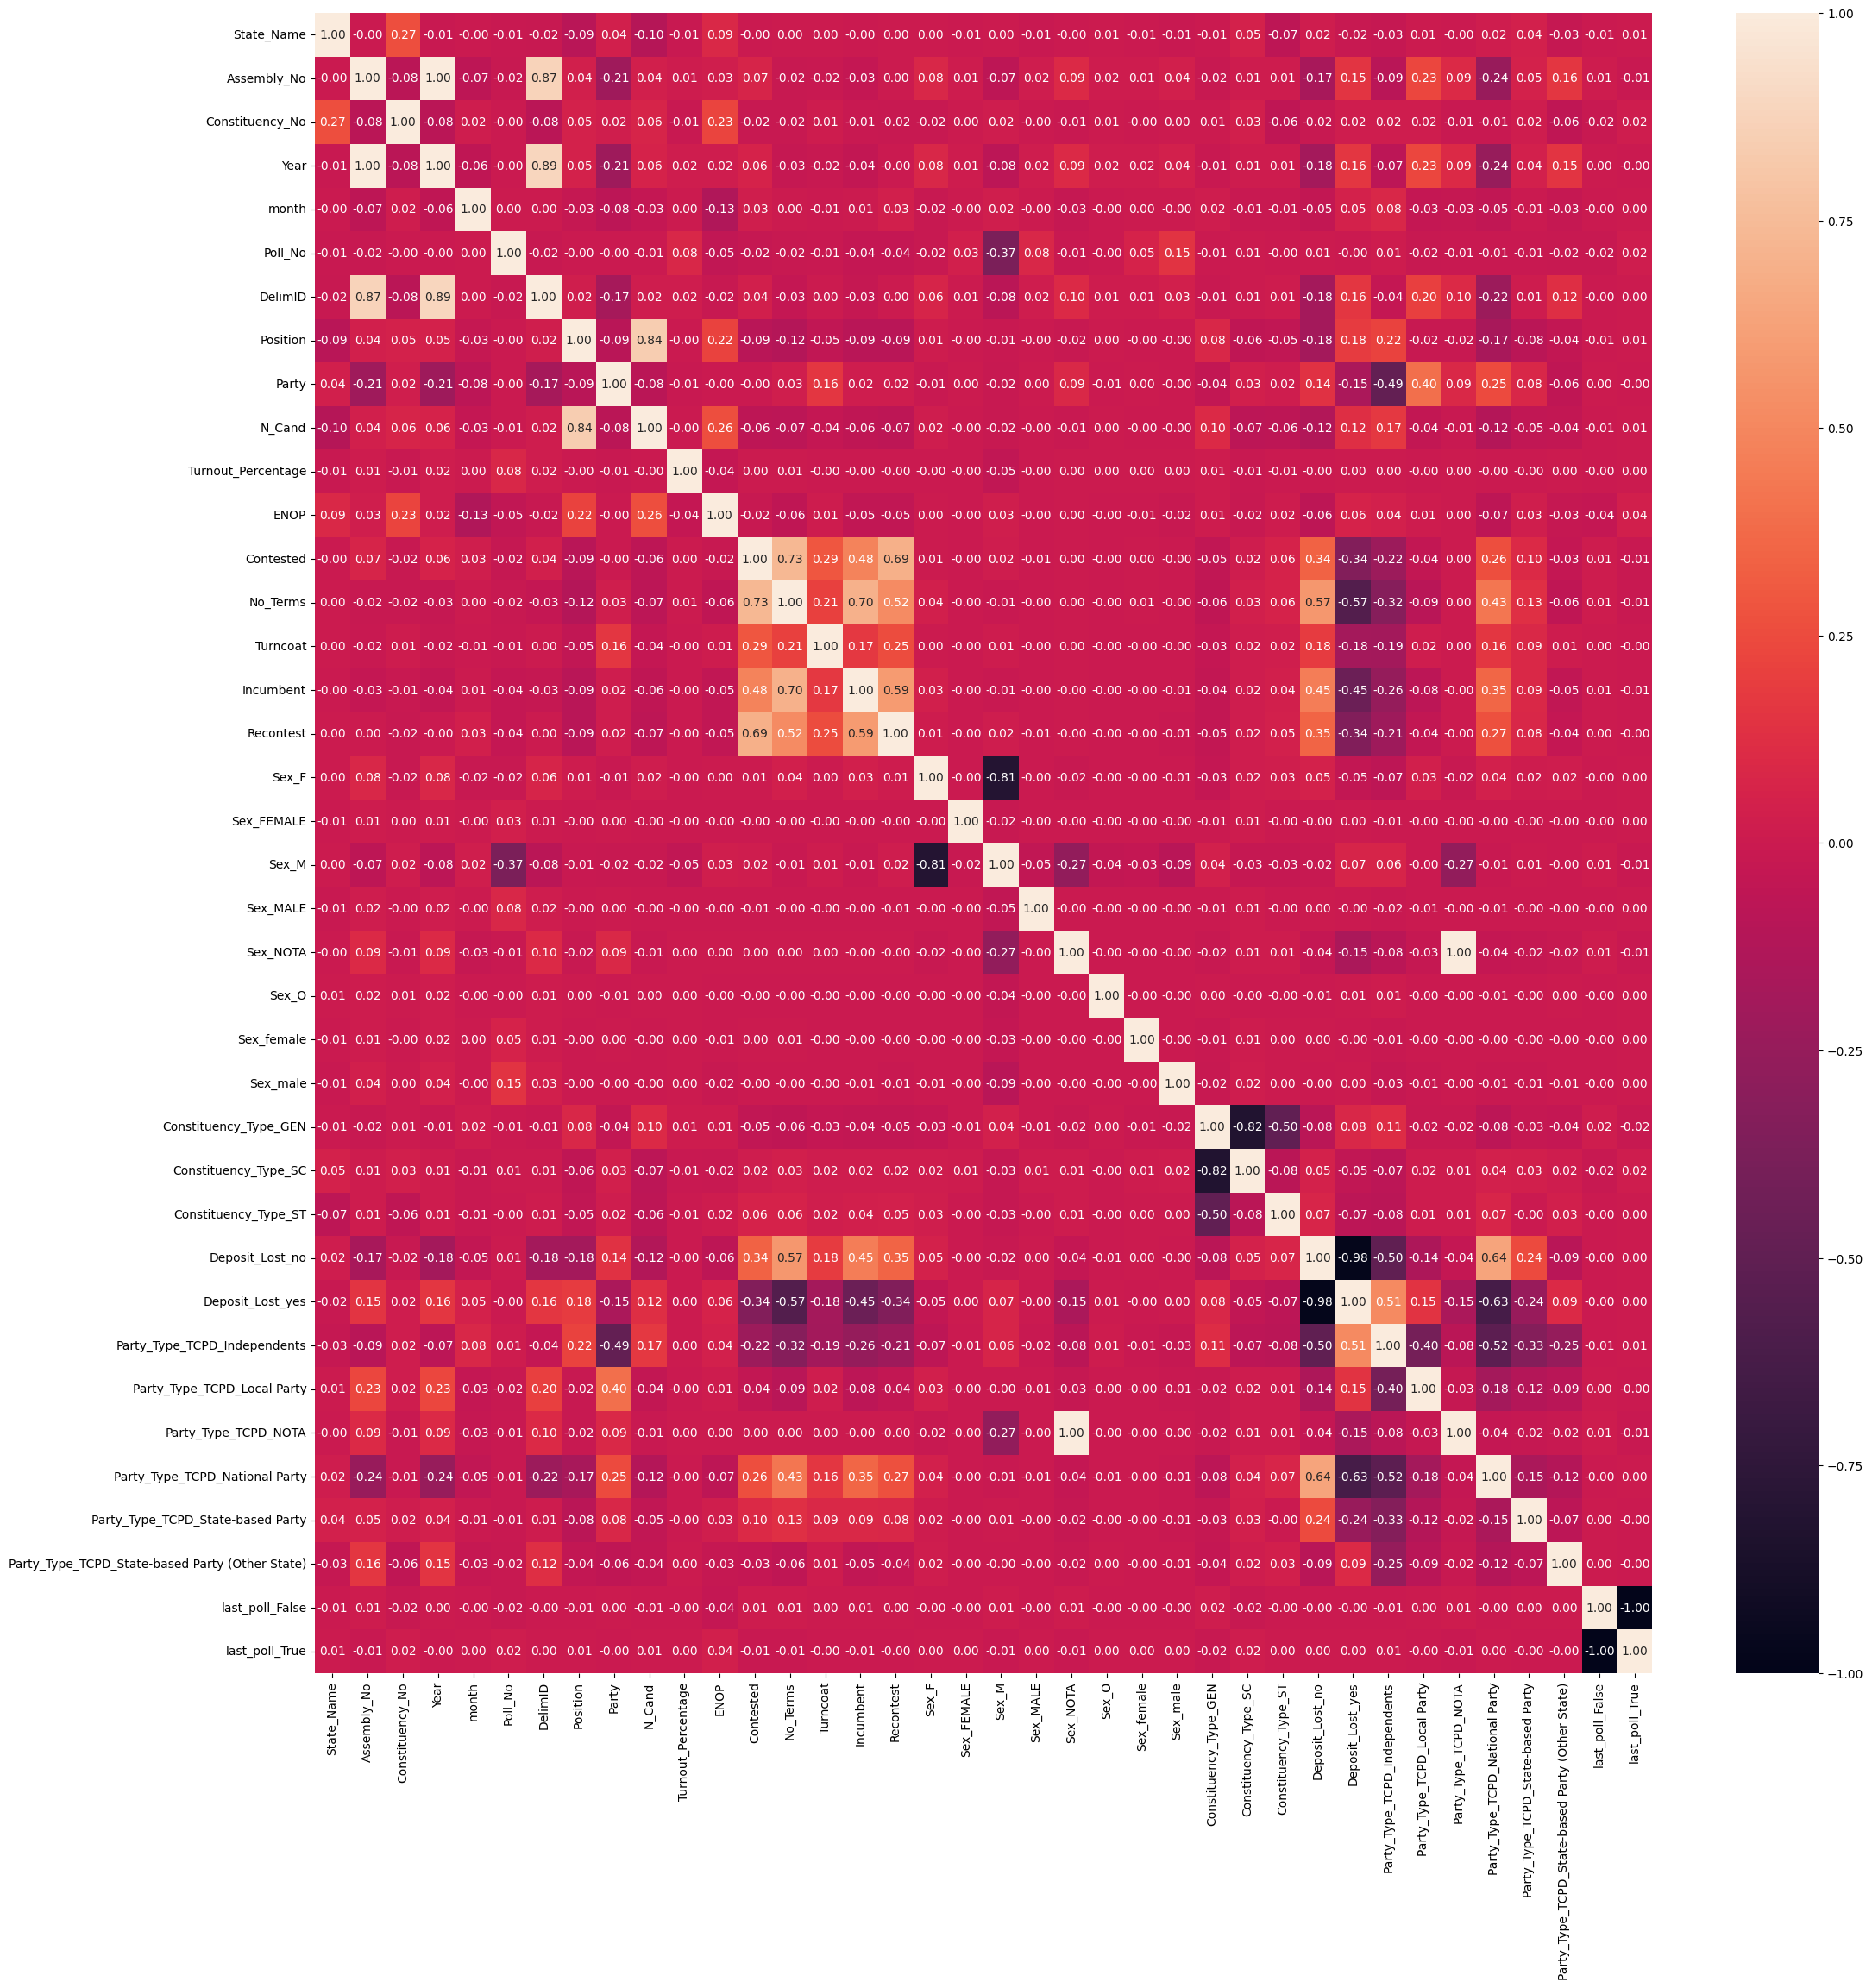

In [ ]:
# Pearson Correlation

import seaborn as sns
import matplotlib.pyplot as plt
 
# correlation matrix
corr = df_uniform.corr(numeric_only=True)
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, fmt='.2f')

In [ ]:
# chi square test to get 10 best predictors for criminal

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

elections_df = df_uniform
X = elections_df.drop(['Party'], axis=1)
y = elections_df['Party']

y = y.astype(int)

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores.nlargest(15,'Score')

#sort rows in featureScores in descending order of Score
featureScores.sort_values(by=['Score'], ascending=False, inplace=True)

X = X[list(featureScores['Specs'].head(15))]

## Classification Problem

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y)


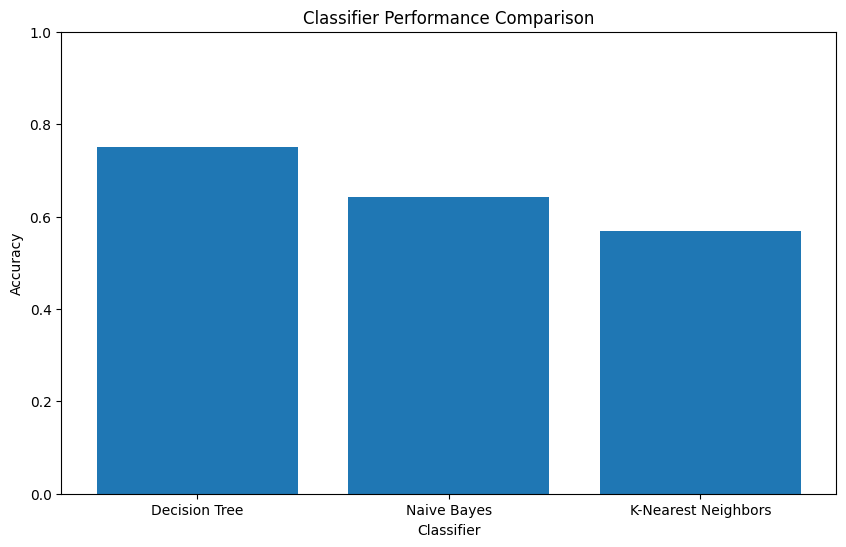

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create classifiers
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Train and evaluate the classifiers
accuracy_scores = []
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy comparison using a bar plot
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in classifiers], accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (accuracy range)
plt.show()